In [2]:
# demo vectorization
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

# Dữ liệu văn bản
texts = ["Deep learning is fun", "Deep learning with Python"]

# 1. Tokenization (chuyển text -> số nguyên)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

print("Sequences:", sequences)
# Ví dụ: [[1, 2, 3, 4], [1, 2, 5, 6]]

# 2. One-hot encoding -> tensor float32
one_hot_results = tokenizer.texts_to_matrix(texts, mode='binary')

print("One-hot shape:", one_hot_results.shape)
print(one_hot_results)


Sequences: [[1, 2, 3, 4], [1, 2, 5, 6]]
One-hot shape: (2, 7)
[[0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 1. 1.]]


In [4]:
# demo normalization
import numpy as np

# Giả sử có 2 features với thang đo khác nhau
# Feature A: [0–1], Feature B: [100–200]
data = np.array([[0.2, 120],
                 [0.8, 180],
                 [0.5, 150]])

print("Dữ liệu gốc:\n", data)

# Chuẩn hóa: mean=0, std=1
mean = data.mean(axis=0)
std = data.std(axis=0)

normalized_data = (data - mean) / std
print("\nDữ liệu đã chuẩn hóa:\n", normalized_data)


Dữ liệu gốc:
 [[  0.2 120. ]
 [  0.8 180. ]
 [  0.5 130. ]]

Dữ liệu đã chuẩn hóa:
 [[-1.22474487 -0.88900089]
 [ 1.22474487  1.3970014 ]
 [ 0.         -0.50800051]]


In [8]:
# demo normalization
from tensorflow import keras

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train[0])

# Scale từ [0, 255] -> [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("Pixel sau chuẩn hóa:", x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [1]:
# demo evaluation protocol
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Giả sử có dữ liệu tabular (samples, features)
X = np.random.rand(200, 5)   # 200 samples, 5 features
y = np.random.randint(0, 2, 200)  # nhãn nhị phân

# --- 1. Holdout Validation ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print("Holdout accuracy:", accuracy_score(y_val, model.predict(X_val)))

# --- 2. K-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_idx, val_idx in kf.split(X):
    model = LogisticRegression()
    model.fit(X[train_idx], y[train_idx])
    scores.append(accuracy_score(y[val_idx], model.predict(X[val_idx])))

print("K-Fold accuracies:", scores)
print("Mean CV accuracy:", np.mean(scores))


Holdout accuracy: 0.5
K-Fold accuracies: [0.5, 0.475, 0.45, 0.525, 0.45]
Mean CV accuracy: 0.4800000000000001


In [2]:
# demo beat baseline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Tạo dữ liệu giả (binary classification)
np.random.seed(42)
X = np.random.rand(200, 5)     # 200 mẫu, 5 đặc trưng
y = np.random.randint(0, 2, 200)

# --- Baseline: dự đoán lớp phổ biến nhất ---
baseline_pred = np.full_like(y, fill_value=y.mean().round())
baseline_acc = accuracy_score(y, baseline_pred)
print("Baseline accuracy:", baseline_acc)

# --- Huấn luyện logistic regression ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print("Model accuracy:", accuracy_score(y_val, y_pred))


Baseline accuracy: 0.525
Model accuracy: 0.675


In [14]:
# demo overfit
from tensorflow import keras
from tensorflow.keras import layers
# Tải MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Giảm kích thước tập dữ liệu huấn luyện để minh họa rõ hơn hiện tượng overfitting
num_samples = 1000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
# Làm phẳng (flatten) các hình ảnh từ 28x28 pixel thành một vector 784 chiều
# Chuẩn hóa giá trị pixel về khoảng 0-1
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255
# Mã hóa one-hot các nhãn
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Định nghĩa Input layer
inputs = keras.Input(shape=(784,))
# --- Mô hình lớn (dễ overfit) ---
# Với dữ liệu nhỏ, mô hình này sẽ overfit mạnh mẽ
big_model = keras.Sequential([
    inputs,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
big_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# Huấn luyện mô hình lớn trong 20 epochs để minh họa hiện tượng overfitting
history_big = big_model.fit(x_train, y_train,
                            epochs=20, batch_size=128,
                            validation_split=0.2, verbose=0)


print("--- Kết quả mô hình lớn (Overfit) ---")
print("Train acc (big model):", history_big.history["accuracy"][-1])
print("Val acc   (big model):", history_big.history["val_accuracy"][-1])


--- Kết quả mô hình lớn (Overfit) ---
Train acc (big model): 1.0
Val acc   (big model): 0.875


In [12]:
# regularization
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Tải MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Giảm kích thước tập huấn luyện để dễ thấy overfitting
num_samples = 1000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]

# Tiền xử lý dữ liệu
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255
x_test  = x_test.reshape(-1, 28*28).astype("float32") / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

# ---- Mô hình lớn có Dropout + L2 ----
inputs = keras.Input(shape=(784,))

big_model_reg = keras.Sequential([
    inputs,
    layers.Dense(
        512,
        activation="relu",
        kernel_regularizer=regularizers.l2(1e-3)  # L2 regularization
    ),
    layers.Dropout(0.5),  # Dropout 50%
    layers.Dense(
        256,
        activation="relu",
        kernel_regularizer=regularizers.l2(1e-4)  # L2 regularization
    ),
    layers.Dropout(0.5),  # Dropout 50%
    layers.Dense(10, activation="softmax")
])

big_model_reg.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Huấn luyện
history = big_model_reg.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

# Đánh giá trên tập test
test_loss, test_acc = big_model_reg.evaluate(x_test, y_test, verbose=0)
print("\n--- Kết quả mô hình lớn có Regularization ---")
print("Train acc:", history.history["accuracy"][-1])
print("Val acc  :", history.history["val_accuracy"][-1])
print("Test acc :", test_acc)



--- Kết quả mô hình lớn có Regularization ---
Train acc: 0.9162499904632568
Val acc  : 0.8849999904632568
Test acc : 0.870199978351593


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


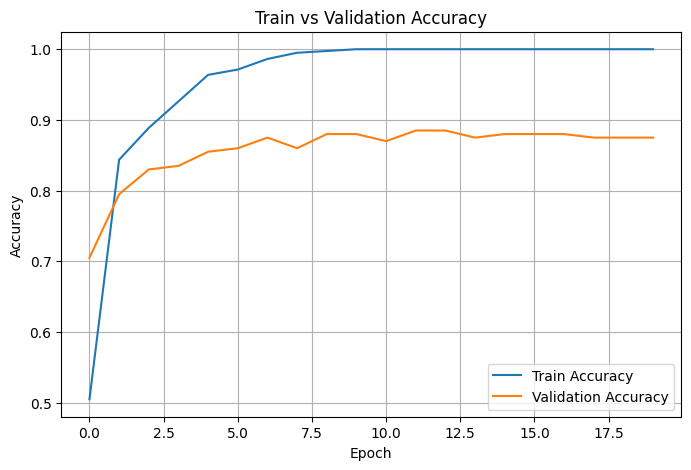

--- Kết quả mô hình lớn (Overfit) ---
Train acc (big model): 1.0
Val acc   (big model): 0.875


In [1]:
# demo overfit
from tensorflow import keras
from tensorflow.keras import layers
# Tải MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Giảm kích thước tập dữ liệu huấn luyện để minh họa rõ hơn hiện tượng overfitting
num_samples = 1000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
# Làm phẳng (flatten) các hình ảnh từ 28x28 pixel thành một vector 784 chiều
# Chuẩn hóa giá trị pixel về khoảng 0-1
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255
# Mã hóa one-hot các nhãn
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Định nghĩa Input layer
inputs = keras.Input(shape=(784,))
# --- Mô hình lớn (dễ overfit) ---
# Với dữ liệu nhỏ, mô hình này sẽ overfit mạnh mẽ
big_model = keras.Sequential([
    inputs,
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
big_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# Huấn luyện mô hình lớn trong 20 epochs để minh họa hiện tượng overfitting
history_big = big_model.fit(x_train, y_train,
                            epochs=20, batch_size=128,
                            validation_split=0.2, verbose=0)
import matplotlib.pyplot as plt

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_big.history['accuracy'], label='Train Accuracy')
plt.plot(history_big.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


print("--- Kết quả mô hình lớn (Overfit) ---")
print("Train acc (big model):", history_big.history["accuracy"][-1])
print("Val acc   (big model):", history_big.history["val_accuracy"][-1])
